___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")

sns.set_style("white")
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15
}
plt.rcParams.update(params)


In [2]:
random_state=42

#### Load Dataset

In [3]:
df_origin= pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
df = df_origin.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.shape

(200, 4)

#### Rename columns

In [7]:
df.columns = ['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)']

In [8]:
df.head(2)
# annual_income:yıllık gelir
# spending_score:harcama puanı

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly.
Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.


- Kümeleme Analizi yaptıktan sonra gözlemleri doğru bir şekilde etiketleyebilmek için verileri iyi bilmeniz gerekir.

- Bağımsız değişkenler ve bağımlı değişken arasındaki özelliklerin, ilişkilerin ve korelasyonların frekans dağılımlarını analiz edin.

- Veri görselleştirme tekniklerinin uygulanması önerilir.

- Kesme noktalarını gözlemlemek, verileri içselleştirmenize yardımcı olur.


In [9]:
df.isnull().sum()

gender                   0
age                      0
annual_income(k$)        0
spending_score(1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,age,annual_income(k$),spending_score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
df.describe(include='O').T

,count,unique,top,freq
gender,200,2,Female,112


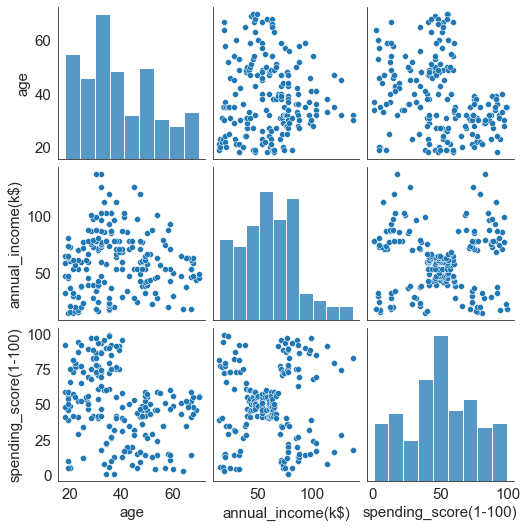

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

,age,annual_income(k$),spending_score(1-100)
age,1.000000,-0.012398,-0.327227
annual_income(k$),-0.012398,1.000000,0.009903
spending_score(1-100),-0.327227,0.009903,1.000000


In [15]:
df.groupby("gender").corr()

age  annual_income(k$)  \
gender                                                      
Female age                    1.000000           0.059912   
       annual_income(k$)      0.059912           1.000000   
       spending_score(1-100) -0.375439           0.047542   
Male   age                    1.000000          -0.092978   
       annual_income(k$)     -0.092978           1.000000   
       spending_score(1-100) -0.279628          -0.023684   

                              spending_score(1-100)  
gender                                               
Female age                                -0.375439  
       annual_income(k$)                   0.047542  
       spending_score(1-100)               1.000000  
Male   age                                -0.279628  
       annual_income(k$)                  -0.023684  
       spending_score(1-100)               1.000000

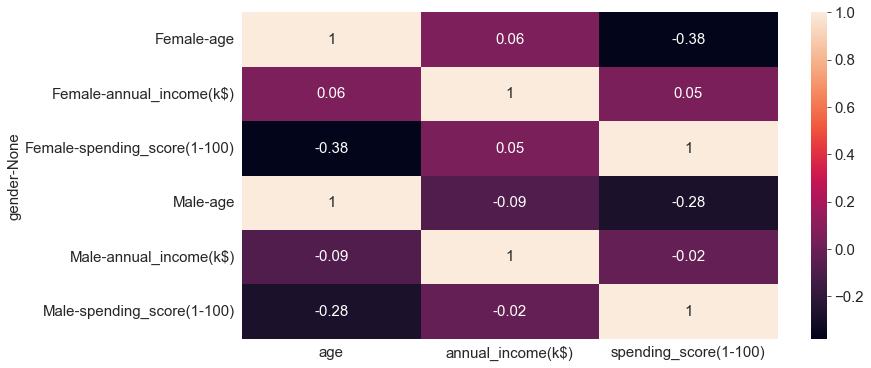

In [16]:
sns.heatmap(df.groupby("gender").corr().round(2), annot=True)
plt.show()

In [17]:
df.skew(axis=0)

age                      0.485569
annual_income(k$)        0.321843
spending_score(1-100)   -0.047220
dtype: float64

In [18]:
df.kurtosis(axis=0, skipna=True)

age                     -0.671573
annual_income(k$)       -0.098487
spending_score(1-100)   -0.826629
dtype: float64

In [19]:
# skewness and kurtosis
pd.concat([df.skew(axis=0, skipna=True), df.kurtosis(axis=0, skipna=True)], axis=1, keys=['skew', 'kurtosis'])

,skew,kurtosis
age,0.485569,-0.671573
annual_income(k$),0.321843,-0.098487
spending_score(1-100),-0.047220,-0.826629


In [20]:
# multiolinarity
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

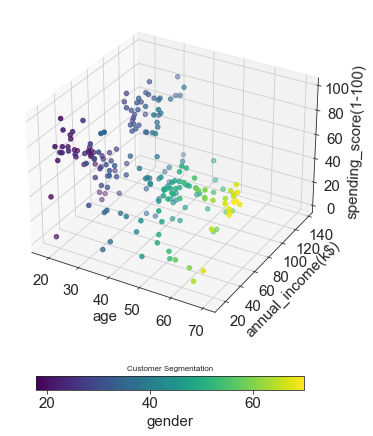

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

In [22]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(
#     df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'], 
#     c=df['age'], cmap='viridis',
#     label='Customer Segmentation'
# )
# ax.set_xlabel('age')
# ax.set_ylabel('annual_income(k$)')
# ax.set_zlabel('spending_score(1-100)')

# cbar = fig.colorbar(
#     ax.get_children()[0], ax=ax, 
#     shrink=0.6, aspect=20, pad=0.1,
#     label='gender',
#     orientation="horizontal"
# )
# cbar.ax.set_title('Customer Segmentation', size=8)
# plt.show()

In [23]:
# fig = plt.figure(figsize=(16,9))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(
#     df['spending_score(1-100)'], df['annual_income(k$)'], df['age'],  
#     c=df['annual_income(k$)']+df['spending_score(1-100)'], cmap='viridis',
#     label='Customer Segmentation'
# )
# ax.set_xlabel('spending_score(1-100)')
# ax.set_ylabel('annual_income(k$)')
# ax.set_zlabel('age')

# cbar = fig.colorbar(
#     ax.get_children()[0], ax=ax, 
#     shrink=0.6, aspect=20, pad=0.1,
#     label='annual_income(k$) + spending_score(1-100)',
#     orientation="horizontal"
# )
# cbar.ax.set_title('Customer Segmentation', size=8)
# plt.show();

In [24]:
# fig = plt.figure(figsize=(18, 2))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.25
# )
# for i, col in enumerate(df.select_dtypes('number').columns):
#     plt.subplot(int(np.ceil(len(df.select_dtypes('number').columns)/3)), 3, i+1)
#     sns.boxplot(y=col, data=df, whis=1.5)
# plt.show();

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

##  KMeans Clustering

In [25]:
# UnSupervised
from sklearn.cluster import KMeans
# import sklearn sklearn.metrics.SCORERS.keys()
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [26]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [27]:
df_not_scaled = df.copy()

In [28]:
# scaled df
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize
scaler = StandardScaler()

numbers = df.select_dtypes(include='number').columns
df[numbers] = scaler.fit_transform(df[numbers])
df

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061
197,Female,0.441365,2.497807,-0.861839
198,Male,-0.491602,2.497807,0.923953


In [29]:
X =df.iloc[:, [1,3]]
X

,age,spending_score(1-100)
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980
...,...,...
196,-0.276302,1.118061
197,0.441365,-0.861839
198,-0.491602,0.923953


#### *ii. Determine optimal number of clusters*

In [30]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=random_state) #random belirtmez isek farklı sonuşlar gelebiliyor
kmeans_model.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

### Hopkins method

In [31]:
from pyclustertend import hopkins

In [32]:
X.shape

(200, 2)

In [33]:
hopkins(X, X.shape[0])

0.29315355865024073

In [34]:
# Elbow method using age and spending score variabels

K = range(2,10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = random_state)#cendroidleri başlatma 'k-means++'(daha akıllı bir cendroid belirliyor random a göre)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    inertia.append(kmeans.inertia_)

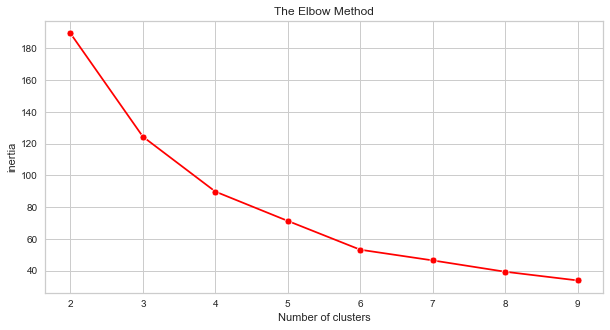

In [35]:
# Elbow method using age and sending score variabels

plt.figure(figsize=(10,5))
sns.lineplot(K , inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [36]:
K=range(2,10)
pd.Series(inertia,index=K).diff(-1)#K nın ilk değerinden başlatma

2    65.061204
3    34.561069
4    18.469651
5    18.121828
6     6.727452
7     7.140412
8     5.469426
9          NaN
dtype: float64

In [37]:
df_diff = pd.DataFrame(inertia, index=K, columns=['forward_diff']).diff(-1)
df_diff

,forward_diff
2,65.061204
3,34.561069
4,18.469651
5,18.121828
6,6.727452
7,7.140412
8,5.469426
9,NaN


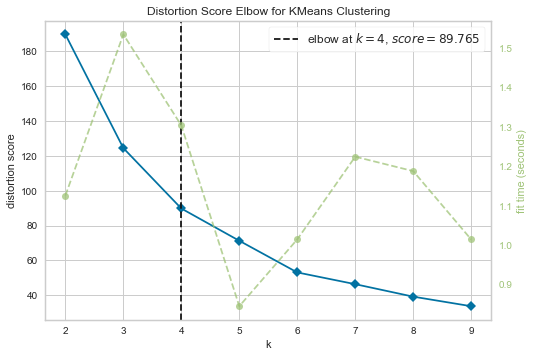

In [38]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=random_state)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers(merkezlere olan uzaklıkların karelerinin toplamının ortalaması.))

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [39]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=random_state)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [40]:
X["predicted_clusters"] = kmeans.labels_
X["predicted_clusters"].value_counts()

2    65
0    50
1    47
3    38
Name: predicted_clusters, dtype: int64

In [41]:
silhouette_score(X, kmeans.labels_)  # cluster sayısı 4 için

0.6449180023090975

In [42]:
# silhouette_scores for different k values( farklı k değerleri için siluet_scores)

for k in K:
    # intialise kmeans
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3775542077359798
For n_clusters=3, the silhouette score is 0.5317742391151472
For n_clusters=4, the silhouette score is 0.6449180023090975
For n_clusters=5, the silhouette score is 0.5986119258817009
For n_clusters=6, the silhouette score is 0.5628759552941623
For n_clusters=7, the silhouette score is 0.4797730516978004
For n_clusters=8, the silhouette score is 0.5561693483093384
For n_clusters=9, the silhouette score is 0.4699506090419534


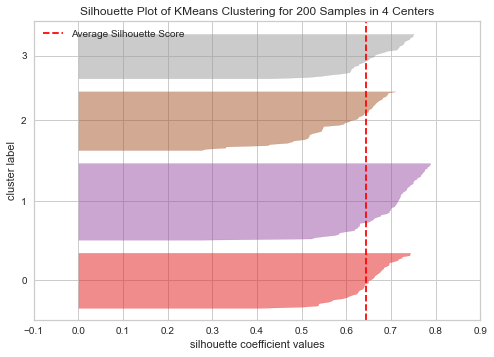

In [43]:
# cluster 4 için(5 olunca - li değer geliyor ve  küme kalitesinin kötü olduğunu gösteriyor)
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=4, random_state=random_state)
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

In [44]:
kmeans.cluster_centers_

array([[ 1.22927178e+00, -6.55836579e-02,  1.00000000e+00],
       [-6.14157248e-01,  1.14971545e+00,  2.00000000e+00],
       [-8.34646601e-01, -3.94427057e-01,  1.11022302e-15],
       [ 6.28336254e-01, -1.36651894e+00,  3.00000000e+00]])

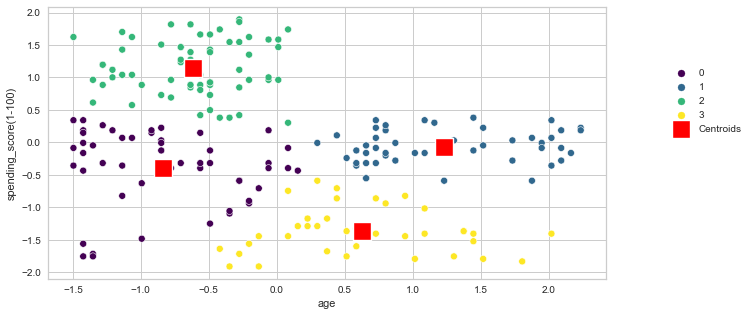

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["age"], X["spending_score(1-100)"], hue= X["predicted_clusters"], palette= "viridis")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.legend(loc=3, bbox_to_anchor=(1.1,0.5))
plt.show();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [46]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

In [47]:
X =df.iloc[:, [2,3]]
X

,annual_income(k$),spending_score(1-100)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


#### *ii. Determine optimal number of cluster*
(Optimum küme sayısını belirleyin)

In [48]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=random_state)
kmeans_model.fit_predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### Hopkins method

In [49]:
X.shape

(200, 2)

In [50]:
hopkins(X, X.shape[0])

0.30684528906055236

In [51]:
# Elbow method using age and spending score variabels
K = range(2,10)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = random_state)
    kmeans.fit(X)
    # inertia method returns wcss for that model(Within-Cluster Sum of Square )
    inertia.append(kmeans.inertia_)

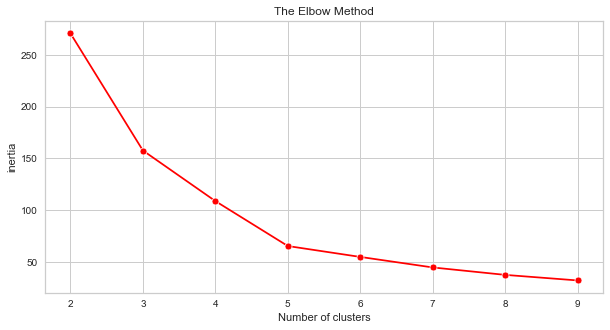

In [52]:
# Elbow method using age and sending score variabels

plt.figure(figsize=(10,5))
sns.lineplot(K, inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [53]:
pd.Series(inertia, index=K).diff(-1)

2    113.000258
3     48.782692
4     43.352908
5     10.511060
6     10.146163
7      7.174782
8      5.361150
9           NaN
dtype: float64

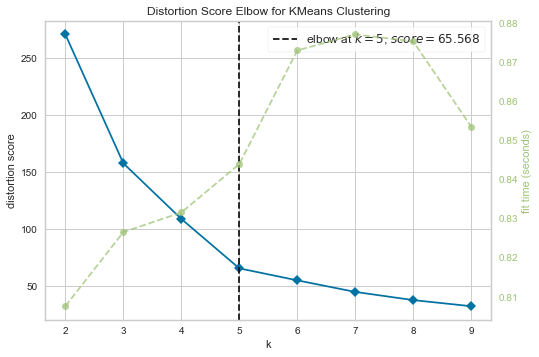

In [54]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=random_state)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers(merkezlere olan uzaklıkların karelerinin toplamının ortalaması)

#### *iii. Apply K Means*

In [55]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=random_state)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [56]:
silhouette_score(X, kmeans.labels_)  # cluster sayısı 5 için

0.5546571631111091

In [57]:
X

,annual_income(k$),spending_score(1-100)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


In [58]:
X["predicted_clusters1"] = kmeans.labels_
X["predicted_clusters1"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters1, dtype: int64

In [59]:
# farklı k değerleri için silhouette_scores
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5801363469864416
For n_clusters=3, the silhouette score is 0.57673750163457
For n_clusters=4, the silhouette score is 0.6280789340729308
For n_clusters=5, the silhouette score is 0.6915071284226041
For n_clusters=6, the silhouette score is 0.6557337844695746
For n_clusters=7, the silhouette score is 0.626111724984628
For n_clusters=8, the silhouette score is 0.5058931327289865
For n_clusters=9, the silhouette score is 0.4914531442014052


#### *iv. Visualizing and Labeling All the Clusters*

In [60]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(X["annual_income(k$)"], X["spending_score(1-100)"], hue= X["predicted_clusters1"], palette= "viridis")
# plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
# plt.show();

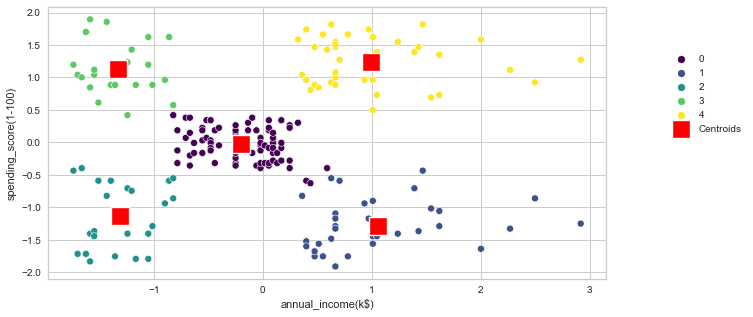

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["annual_income(k$)"], X["spending_score(1-100)"], hue= X["predicted_clusters1"], palette= "viridis")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.legend(loc=3, bbox_to_anchor=(1.1,0.5))
plt.show();

2: low_income_low_spent
    
3: low_income_high_spent
    
0: medium_income_medium_spent
    
1: high_income_low_spent
    
4: high_income_high-spent 

In [62]:
#df_not_scaled

In [63]:
df1=df_not_scaled[['annual_income(k$)', 'spending_score(1-100)']]

In [64]:
df1["labels"]=kmeans.labels_

In [65]:
df1

,annual_income(k$),spending_score(1-100),labels
CustomerID,,,
1,15,39,2
2,15,81,3
3,16,6,2
4,16,77,3
5,17,40,2
...,...,...,...
196,120,79,4
197,126,28,1
198,126,74,4


In [66]:
df1["labels"] = df1.labels.map({0:"medium_income_medium_spent",
                              1:"high_income_low_spent",
                              2:"low_income_low_spent",
                              3:"low_income_high_spent",
                              4:"high_income_high_spent"})
df1

,annual_income(k$),spending_score(1-100),labels
CustomerID,,,
1,15,39,low_income_low_spent
2,15,81,low_income_high_spent
3,16,6,low_income_low_spent
4,16,77,low_income_high_spent
5,17,40,low_income_low_spent
...,...,...,...
196,120,79,high_income_high_spent
197,126,28,high_income_low_spent
198,126,74,high_income_high_spent


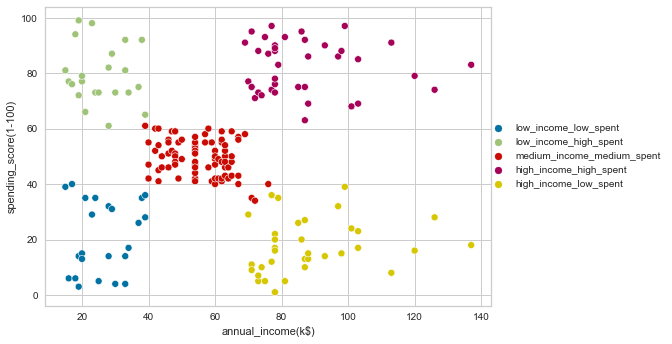

In [67]:
sns.scatterplot(data=df1, x="annual_income(k$)" ,y="spending_score(1-100)", hue="labels")
plt.legend(loc="center right",bbox_to_anchor=(1.4,0.5))
plt.show()


In [68]:
clus_pred =df1.groupby("labels").mean().T
clus_pred

labels,high_income_high_spent,high_income_low_spent,low_income_high_spent,low_income_low_spent,medium_income_medium_spent
annual_income(k$),86.538462,88.200000,25.727273,26.304348,55.296296
spending_score(1-100),82.128205,17.114286,79.363636,20.913043,49.518519


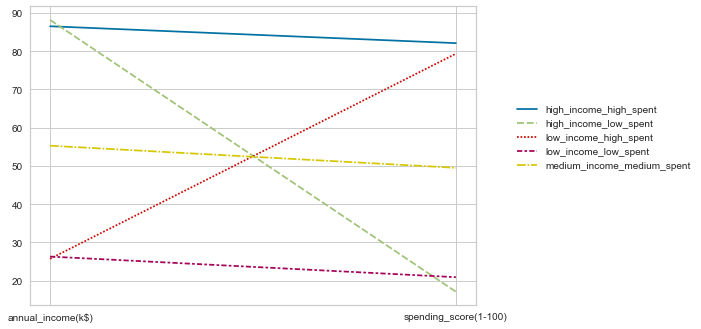

In [69]:
sns.lineplot(data = clus_pred)
plt.legend(bbox_to_anchor=(1.5,0.7))
plt.show()

## Hierarchical Clustering (Agglomerative)

### *i. Determine optimal number of clusters using Dendogram*

#### Clustering based on Age and Spending Score- x1

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
df

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061
197,Female,0.441365,2.497807,-0.861839
198,Male,-0.491602,2.497807,0.923953


In [72]:
X1 =df.iloc[:, [1,3]]
X1

,age,spending_score(1-100)
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980
...,...,...
196,-0.276302,1.118061
197,0.441365,-0.861839
198,-0.491602,0.923953


In [73]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

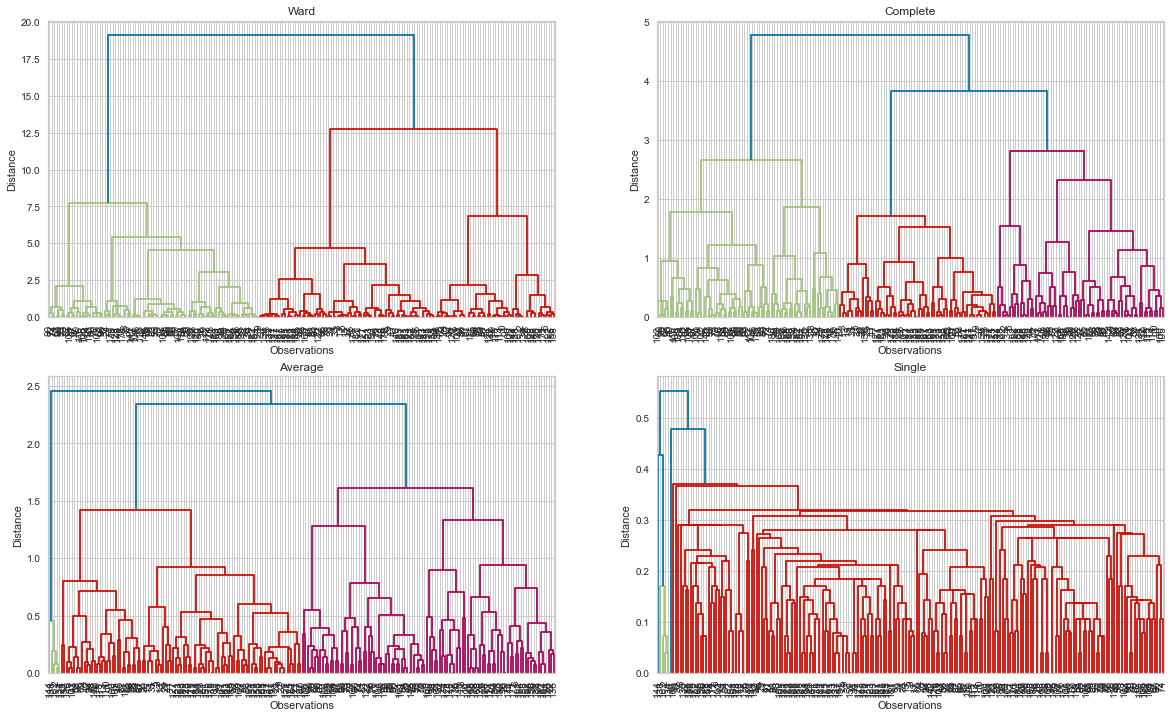

In [74]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")  
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10)
plt.show()

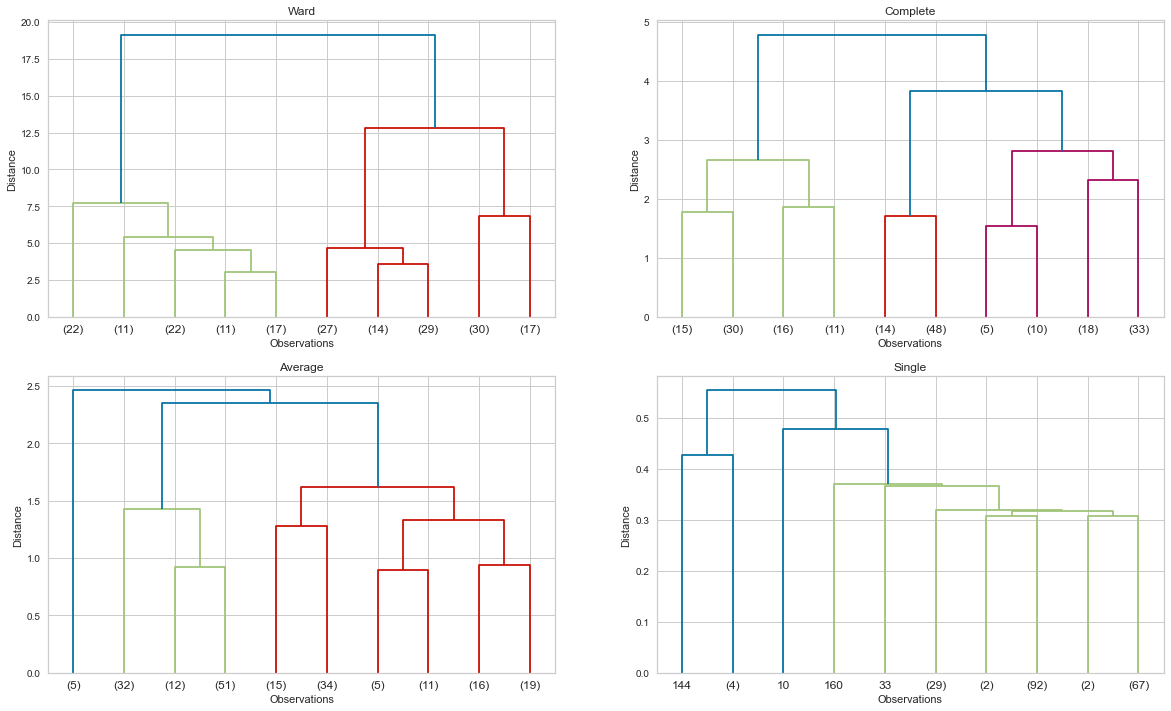

In [75]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10)# truncate_mode='lastp', p=10 (10 küme gösterir)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10)
plt.show()

In [76]:
# %matplotlib inline
# sns.set_style("whitegrid", {'axes.grid' : False})
# plt.figure(figsize = (20,12))

# scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
# for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
#     plt.subplot(2, 2, i+1) 
#     plt.title(f'{scorelist[i]}')
#     plt.xlabel("Observations")
#     plt.ylabel("Distance")
#     # truncate_mode='lastp', p=10(10 küme gösterir)
#     dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)

#### Clustering based on Annual Income and Spending Score- x2

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [78]:
X2 =df.iloc[:, [2,3]]
X2

,annual_income(k$),spending_score(1-100)
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


In [79]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

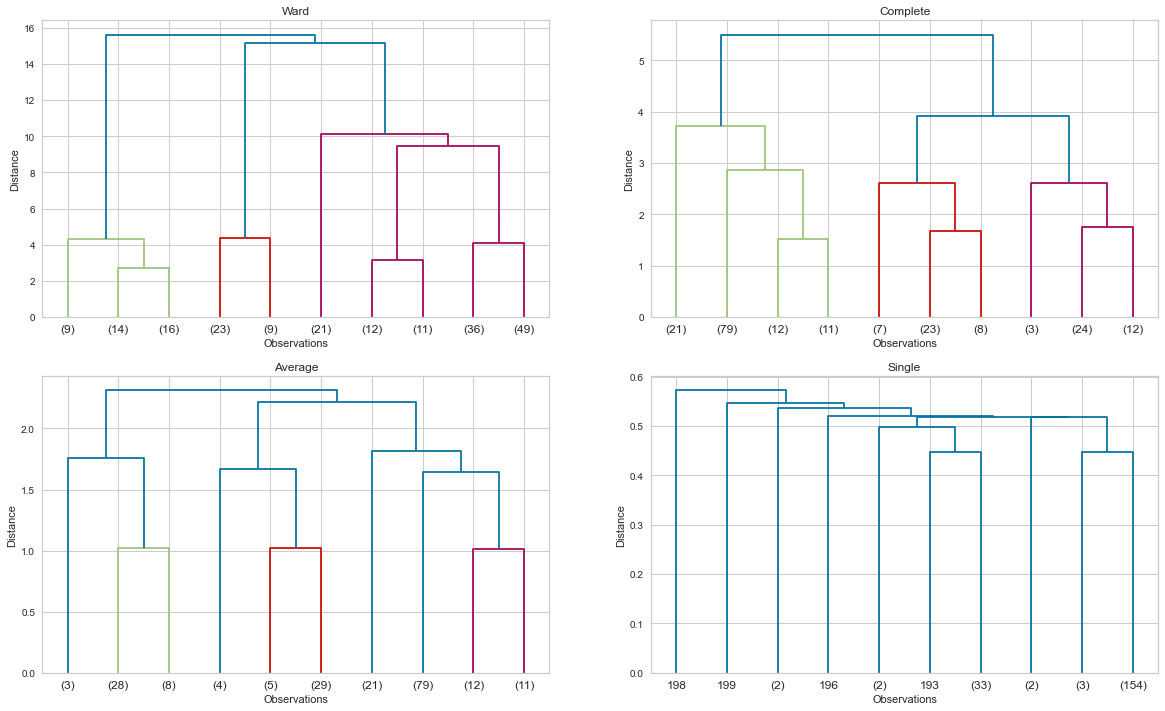

In [80]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10)
plt.show()

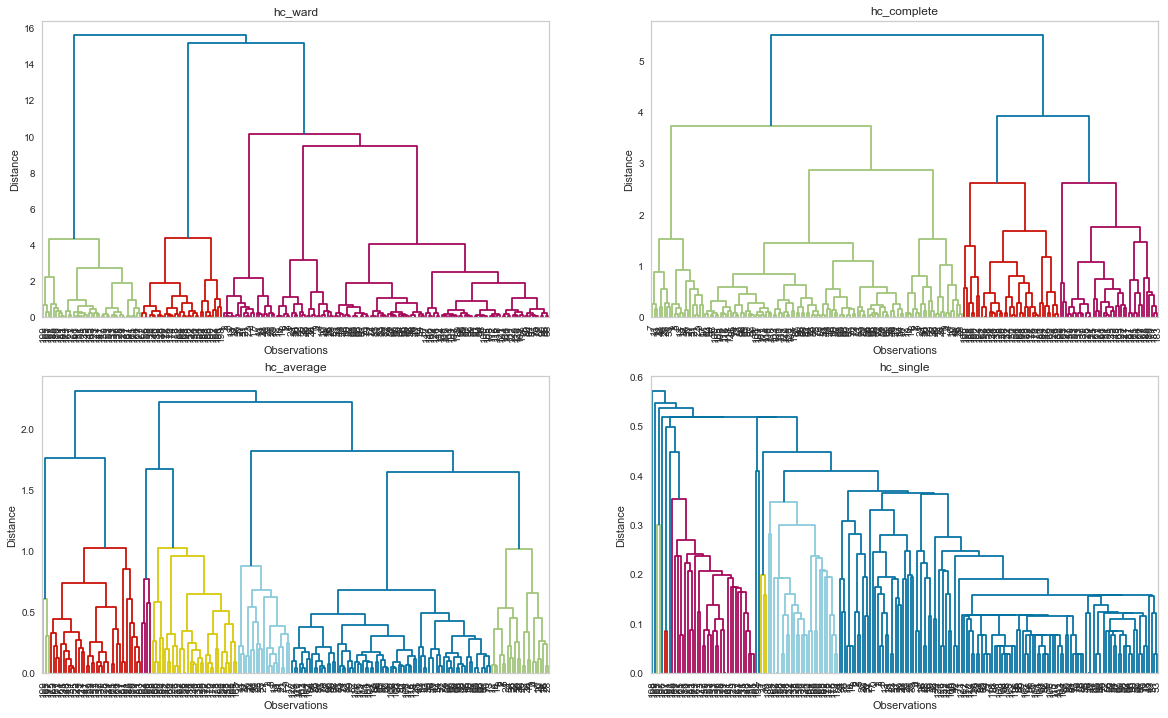

In [81]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)

In [82]:
# %matplotlib inline
# sns.set_style("whitegrid", {'axes.grid' : False})
# plt.figure(figsize = (20,12))

# scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
# for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
#     plt.subplot(2, 2, i+1) 
#     plt.title(f'{scorelist[i]}')
#     plt.xlabel("Observations")
#     plt.ylabel("Distance")
#     # truncate_mode='lastp', p=10(10 küme gösterir)
#     dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [83]:
X1

,age,spending_score(1-100)
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980
...,...,...
196,-0.276302,1.118061
197,0.441365,-0.861839
198,-0.491602,0.923953


In [84]:
#built model
from sklearn.cluster import AgglomerativeClustering

In [85]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


In [86]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

#### Annual Income and Spending Score- x2

In [87]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


In [88]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [89]:
X1["label1"] = model1.labels_

In [90]:
X1

,age,spending_score(1-100),label1
CustomerID,,,
1,-1.424569,-0.434801,1
2,-1.281035,1.195704,2
3,-1.352802,-1.715913,1
4,-1.137502,1.040418,2
5,-0.563369,-0.395980,1
...,...,...,...
196,-0.276302,1.118061,2
197,0.441365,-0.861839,0
198,-0.491602,0.923953,2


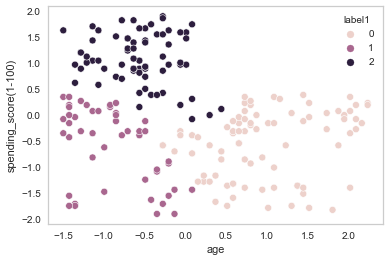

In [91]:
sns.scatterplot(data= X1, x="age", y="spending_score(1-100)", hue="label1")
plt.show()

In [92]:
clus_pred1 = X1.groupby("label1").mean().T
clus_pred1

label1,0,1,2
age,0.985236,-0.894717,-0.567469
spending_score(1-100),-0.565298,-0.599174,1.072584


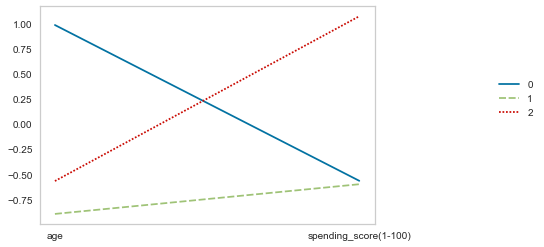

In [93]:
sns.lineplot(data = clus_pred1)
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.show()

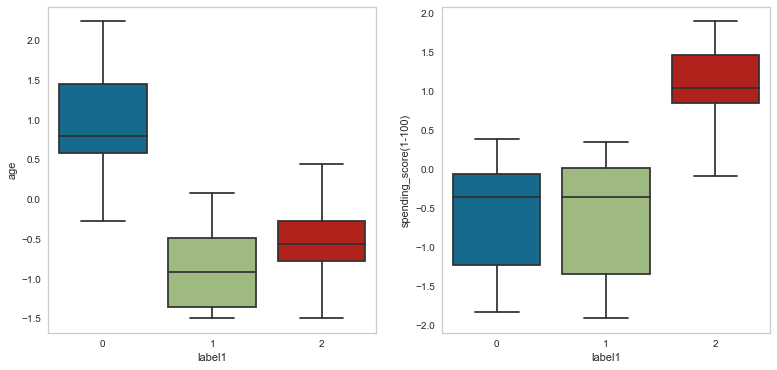

In [95]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "age", x = "label1", data =X1)

plt.subplot(132)
sns.boxplot(y = "spending_score(1-100)", x = "label1", data = X1)

# plt.subplot(133)
# sns.boxplot(y = "annual_income(k$)", x = "label1", data = X1)
plt.show()

#### Annual Income and Spending Score- x2

In [96]:
X2["label2"] = model2.labels_

In [97]:
X2

,annual_income(k$),spending_score(1-100),label2
CustomerID,,,
1,-1.738999,-0.434801,4
2,-1.738999,1.195704,3
3,-1.700830,-1.715913,4
4,-1.700830,1.040418,3
5,-1.662660,-0.395980,4
...,...,...,...
196,2.268791,1.118061,1
197,2.497807,-0.861839,0
198,2.497807,0.923953,1


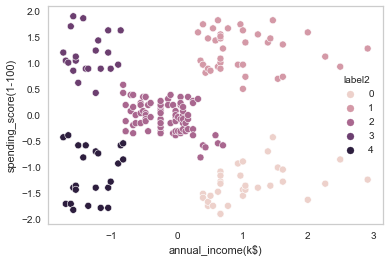

In [98]:
sns.scatterplot(data= X2, x="annual_income(k$)", y="spending_score(1-100)", hue="label2")
plt.show()

In [99]:
clus_pred = X2.groupby("label2").mean().T
clus_pred

label2,0,1,2,3,4
annual_income(k$),1.101045,0.991583,-0.181237,-1.353670,-1.307519
spending_score(1-100),-1.343469,1.239503,-0.041562,1.158731,-1.136965


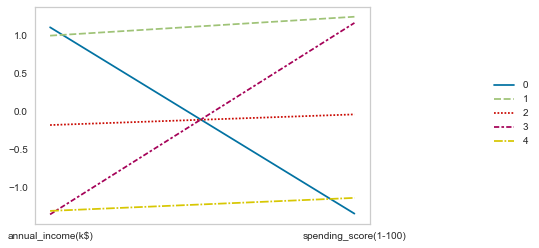

In [100]:
sns.lineplot(data = clus_pred.iloc[0:4,:])
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.show()

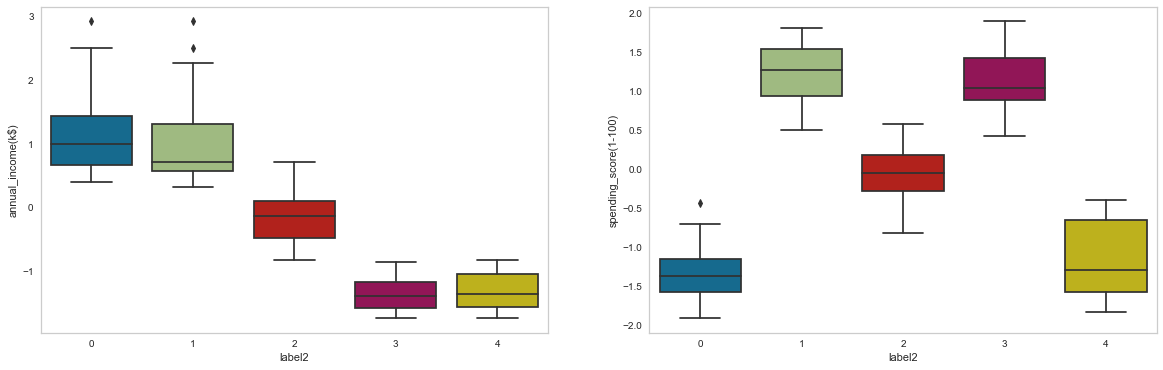

In [101]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y = "annual_income(k$)", x = "label2", data = X2)

plt.subplot(122)
sns.boxplot(y = "spending_score(1-100)", x = "label2", data = X2)
plt.show()

#### Interpretation based on Age and Spending Score- x1

Boxplotlar yeterince birbirinden ayrılmadığı için kümelemeye uygun olmadığını gözlemledik

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___